# Project 2: Credit Risk and Statistical Learning

**Names of all group members:**
- Felix Tobiasson Reinemo (felix.reinemo@epfl.ch)
- Tellef Skofteland (tellef.skofteland@epfl.ch)
- Erling Fjelstad (erling.fjelstad@epfl.ch)


---

All code below is only suggestive and you may as well use different approaches.

### Task 1

In [ ]:
import numpy as np
np.random.seed(0)  # for reproducibility

# Simulate explanatory variables x
m = 20000
n = 10000
N = m + n 

x1 = np.random.uniform(18, 80, size = N)

x2 = np.random.uniform(1, 15, size = N)

x3 = np.random.binomial(n = 1, p = 0.1, size = N)

# a) Calculate empirical means and standard deviations over training data
mean1 = x1[:m].mean()
mean2 = x2[:m].mean()
mean3 = x3[:m].mean()

std1 = x1[:m].std()
std2 = x2[:m].std()
std3 = x3[:m].std()

print(f'The mean age is {mean1:.2f} and the standard deviation is {std1:.2f}')
print(f'The mean salaray is {mean2:.2f} thousand CHF and the standard deviation is {std2:.2f}')
print(f'The mean employement standard is {mean3}, where 0 is emplyed and 1 self-employed, and the standard deviation is {std3:.2f}')

# b) Suggest other variables that would realistically be relevant in credit scoring.
'''
Other possible variables that would be relevant in credit scoring are:

Financial Behaviour:
- Debt-to-income ratio
- Amounts owed
- Number of active credit lines

Credit history:
- Length of credit history
- Payment history
- Past defaults

Socio-Economic factors:
- Savings
- Home ownership
- Employement stability
'''

The mean age is 48.74 and the standard deviation is 18.01
The mean salaray is 7.99 thousand CHF and the standard deviation is 4.03
The mean employement standard is 0.1017, where 0 is emplyed and 1 self-employed, and the standard deviation is 0.30


'\nOther possible variables that would be relevant in credit scoring are:\n\nFinancial Behaviour:\n- Debt-to-income ratio\n- Amounts owed\n- Number of active credit lines\n\nCredit history:\n- Length of credit history\n- Payment history\n- Past defaults\n\nSocio-Economic factors:\n- Savings\n- Home ownership\n- Employement stability\n'

In [2]:
th_mean1 = (80+18)/2
th_std1 = (80-18)/np.sqrt(12)

print(f'The theoretical mean age is {th_mean1:.2f} and std is {th_std1:.2f}')

th_mean2 = (15+1)/2
th_std2 = (15-1)/np.sqrt(12)

print(f'The theoretical mean income is {th_mean2:.2f} and std is {th_std2:.2f}')

th_mean3 = 0.1 * 1
th_std3 = np.sqrt(0.1 * 1 * (1 - 0.1))

print(f'The theoretical mean employement status is {th_mean3:.2f} and std is {th_std3:.2f}')

The theoretical mean age is 49.00 and std is 17.90
The theoretical mean income is 8.00 and std is 4.04
The theoretical mean employement status is 0.10 and std is 0.30


### Task 2

In [3]:
# Building the datasets:
x = np.column_stack((x1, x2, x3))
sigmoid = lambda x: 1. / (1. + np.exp(-x))

eps = np.random.uniform(0, 1, N)

# Build the first dataset
def p1(x):
    return sigmoid(13.3-0.33*x[0] + 3.5*x[1] - 3 * x[2])


p1_values = np.array([p1(x[i]) for i in range(N)])
y1 = np.array([1 if eps[i] < p1_values[i] else 0 for i in range(N)])


# Build the second dataset
def p2(x):
    x1 = 1 if x[0] < 25 or x[0] > 75 else 0
    return sigmoid(5-10*(x1) +1.1*x[1] - x[2])

p2_values = np.array([p2(x[i]) for i in range(N)])
y2 = np.array([1 if eps[i] < p2_values[i] else 0 for i in range(N)])

### a)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import pandas as pd

# Split into training and test sets
x_train = x[:m]
x_test = x[m:]
y1_train = y1[:m]
y1_test = y1[m:]
y2_train = y2[:m]
y2_test = y2[m:]

# Fit the model on both datasets
model1 = LogisticRegression(random_state=42).fit(x_train, y1_train)
model2 = LogisticRegression(random_state=42).fit(x_train, y2_train)

# Calculate cross-entropy loss on both datasets for train and test
loss_y1_train = log_loss(y1_train, model1.predict_proba(x_train))
loss_y1_test = log_loss(y1_test, model1.predict_proba(x_test))

loss_y2_train = log_loss(y2_train, model2.predict_proba(x_train))
loss_y2_test = log_loss(y2_test, model2.predict_proba(x_test))

print("Cross-entropy losses:")
losses = pd.DataFrame({
    "Dataset 1": [loss_y1_train, loss_y1_test],
    "Dataset 2": [loss_y2_train, loss_y2_test]
}, index=["Train", "Test"])

print(losses)

Cross-entropy losses:
       Dataset 1  Dataset 2
Train   0.029657   0.153539
Test    0.034860   0.148644


### b)

In [5]:
# Calculate normalized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC

# Fit the model for both datasets
C = 0.2
model1_svm = SVC(kernel="rbf", gamma=0.1, C=C, probability=True, random_state=42).fit(x_train_scaled, y1_train)
model2_svm = SVC(kernel="rbf", gamma=0.1, C=C, probability=True, random_state=42).fit(x_train_scaled, y2_train)

In [7]:
# Calculate cross-entropy loss on both datasets for train and test
pred1_train = model1_svm.predict_proba(x_train_scaled)
pred1_test = model1_svm.predict_proba(x_test_scaled)
pred2_train = model2_svm.predict_proba(x_train_scaled)
pred2_test = model2_svm.predict_proba(x_test_scaled)
loss1_train_svm = log_loss(y1_train, pred1_train)
loss1_test_svm = log_loss(y1_test, pred1_test)
loss2_train_svm = log_loss(y2_train, pred2_train)
loss2_test_svm = log_loss(y2_test, pred2_test)
print("Cross-entropy losses with SVM:")
losses_svm = pd.DataFrame({
    "Dataset 1": [loss1_train_svm, loss1_test_svm],
    "Dataset 2": [loss2_train_svm, loss2_test_svm]
}, index=["Train", "Test"])
print(losses_svm)

Cross-entropy losses with SVM:
       Dataset 1  Dataset 2
Train   0.031893   0.071243
Test    0.038733   0.067220


### c)

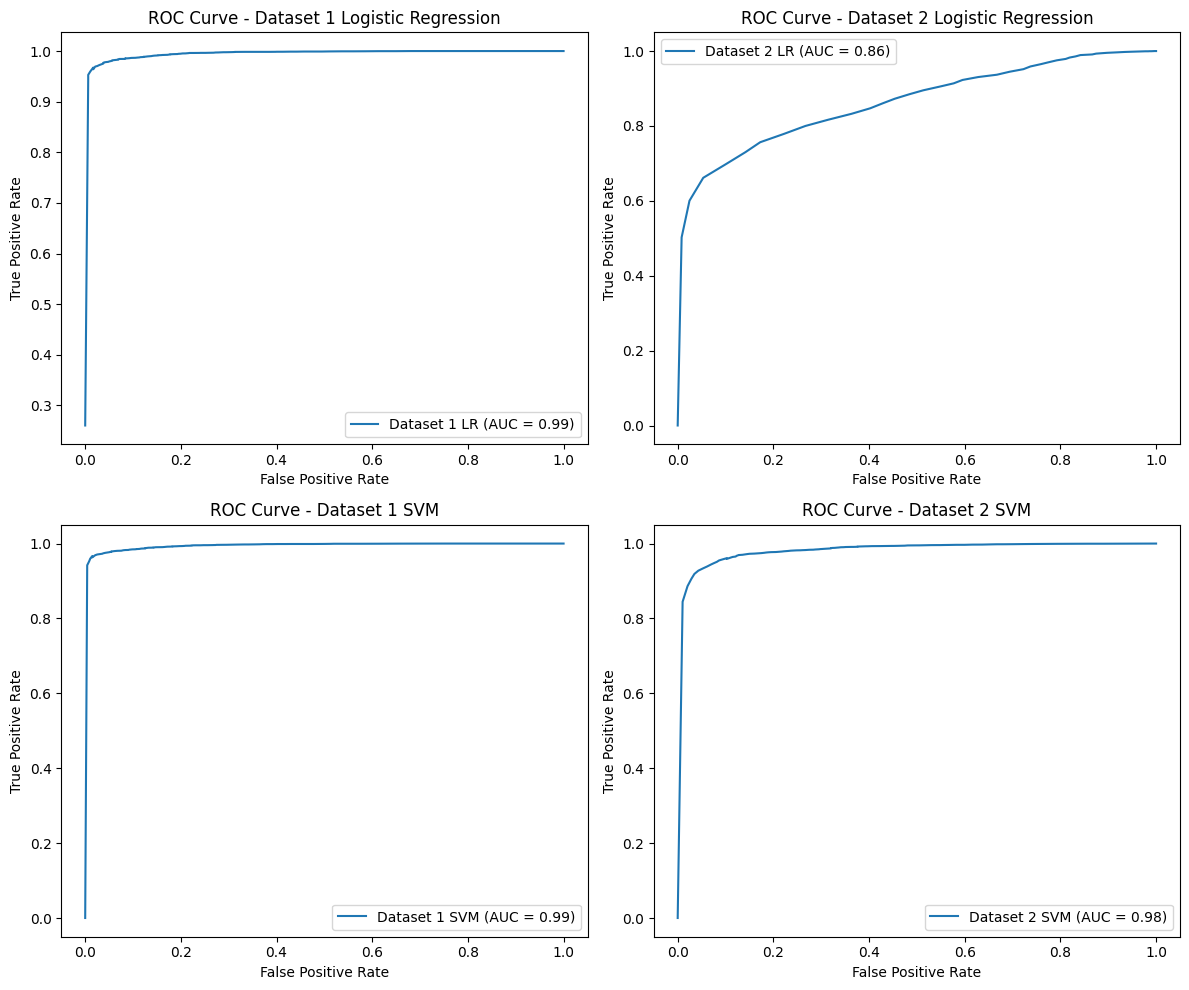

In [8]:
import matplotlib.pyplot as plt

#  Thresholds for ROC curve
ths = np.linspace(0, 1, 100)

def compute_roc_auc(y_true, y_prob, thresholds):
    """Compute ROC curve and AUC from scratch.
    
    Args:
        y_true (array-like): True binary labels (0 or 1).
        y_prob (array-like): Predicted probabilities for the positive class.
        thresholds (array-like): Thresholds to compute TPR and FPR.
        
    Returns:
        fpr (np.ndarray): False Positive Rates.
        tpr (np.ndarray): True Positive Rates.
        auc (float): Area Under the Curve.
    """
    tpr_list = []
    fpr_list = []
    
    for c in thresholds:
        y_pred = (y_prob >= c).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # Sort by FPR (ascending)
    order = np.argsort(fpr_list)
    fpr = np.array(fpr_list)[order]
    tpr = np.array(tpr_list)[order]

    # Compute Riemann-sum AUC
    auc = 0.0
    for i in range(1, len(fpr)):
        auc += (tpr[i] + tpr[i-1]) / 2 * (fpr[i] - fpr[i-1])

    return fpr, tpr, auc

# Plotting the ROC curves, in 2*2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


# Compute and plot the ROC and AUC cruves

# First data set & logistic regression:
y1_prob_lr = model1.predict_proba(x_test)[:, 1]
fpr1_lr, tpr1_lr, auc1_lr = compute_roc_auc(y1_test, y1_prob_lr, ths)
axs[0, 0].plot(fpr1_lr, tpr1_lr, label=f'Dataset 1 LR (AUC = {auc1_lr:.2f})')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - Dataset 1 Logistic Regression')
axs[0, 0].legend()

# Second data set & logistic regression:
y2_prob_lr = model2.predict_proba(x_test)[:, 1]
fpr2_lr, tpr2_lr, auc2_lr = compute_roc_auc(y2_test, y2_prob_lr, ths)
axs[0, 1].plot(fpr2_lr, tpr2_lr, label=f'Dataset 2 LR (AUC = {auc2_lr:.2f})')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - Dataset 2 Logistic Regression')
axs[0, 1].legend()

# First data set and SVM:
y1_prob_svm = model1_svm.predict_proba(x_test_scaled)[:, 1]
fpr1_svm, tpr1_svm, auc1_svm = compute_roc_auc(y1_test, y1_prob_svm, ths)
axs[1, 0].plot(fpr1_svm, tpr1_svm, label=f'Dataset 1 SVM (AUC = {auc1_svm:.2f})')
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - Dataset 1 SVM')
axs[1, 0].legend()

# Second data set and SVM:
y2_prob_svm = model2_svm.predict_proba(x_test_scaled)[:, 1]
fpr2_svm, tpr2_svm, auc2_svm = compute_roc_auc(y2_test, y2_prob_svm, ths)
axs[1, 1].plot(fpr2_svm, tpr2_svm, label=f'Dataset 2 SVM (AUC = {auc2_svm:.2f})')
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - Dataset 2 SVM')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [9]:
# Show the AUC values in a table
auc_values = pd.DataFrame({
    "Dataset 1": [auc1_lr, auc1_svm],
    "Dataset 2": [auc2_lr, auc2_svm]
}, index=["Logistic Regression", "SVM"])
print("AUC values:")
print(auc_values)

AUC values:
                     Dataset 1  Dataset 2
Logistic Regression   0.993811   0.862396
SVM                   0.993474   0.980318


### Task 3

In [10]:
# Set model parameters and define matrix D
loan = 1000
k = 50000

epsilon_ik = np.random.rand(n,k)

D = (epsilon_ik < p2_values[m:, None]).astype(int)

In [11]:
def simulate_policy(rate, lend_indicator):
    """Simulate lending policy and compute total PnL.

    Args:
        rate (float): Loan interest rate.
        lend_indicator (array-like): Binary indicator of accepted borrowers.
    
    Returns:
        total_pnl (np.ndarray): Total profit and loss for each simulation.
    """
    L = lend_indicator[:, None]
    pnl_per_loan = L * (loan * (1 + rate) * D - loan)
    total_pnl = pnl_per_loan.sum(axis=0)

    return total_pnl

In [12]:
def risk(pnl, alpha = 0.95):
    """Compute VaR and ES from profit and loss simulations.
    
    Args:
        pnl (array-like): Profit and loss simulations.
        alpha (float): Confidence level for VaR and ES.
    
    Returns:
        VaR (float): Value at Risk at level alpha.
        ES (float): Expected Shortfall at level alpha.
    """
    losses = -pnl
    VaR = np.quantile(losses, alpha)
    ES = losses[losses >= VaR].mean()

    return VaR, ES

#### Policy 1:

In [13]:
# Define Portfolio and possible outcomes for this portfolio using matrix D
lend_all = np.ones(n, dtype=int)
pnl_i = simulate_policy(0.055, lend_all)

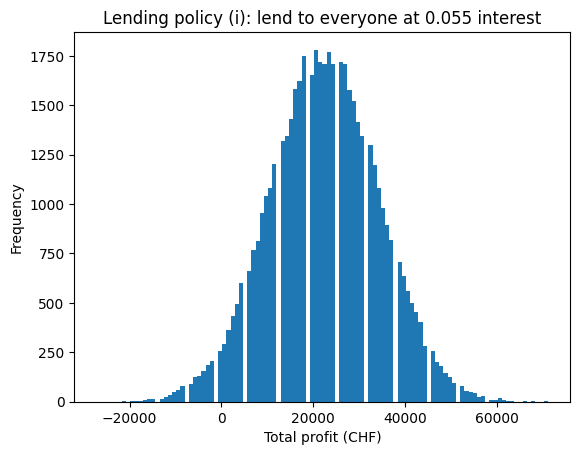

In [14]:
# Plot the histogram of profits and losses
plt.hist(pnl_i, bins = 'auto')
plt.title('Lending policy (i): lend to everyone at 0.055 interest')
plt.xlabel('Total profit (CHF)')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Calculate expected profit and losses, compute 95%-VaR and 95%-ES
E_i = pnl_i.mean()
VaR_i, ES_i = risk(pnl_i)
print(f'Policy (i): Mean = {E_i:.2f}, VaR = {VaR_i}, ES = {ES_i:.2f}')

Policy (i): Mean = 22360.11, VaR = -2455.0, ES = 2166.89


#### Policy 2: 

In [16]:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the logistic regression model
p2_log = model2.predict_proba(x_test)[:,1]
lend_log = (p2_log > 0.95).astype(int)
pnl_ii = simulate_policy(0.01, lend_log)

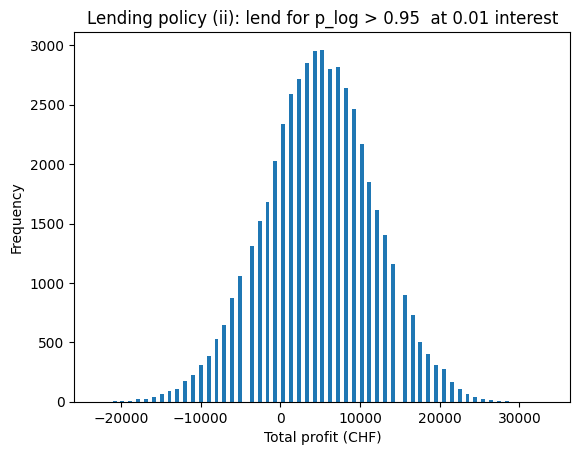

In [17]:
# Plot the histogram of profits and losses
plt.hist(pnl_ii, bins = 'auto')
plt.title('Lending policy (ii): lend for p_log > 0.95  at 0.01 interest')
plt.xlabel('Total profit (CHF)')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Calculate expected profit and losses, compute 95%-VaR and 95%-ES
E_ii = pnl_ii.mean()
VaR_ii, ES_ii = risk(pnl_ii)
print(f'Policy (ii): Mean = {E_ii}, VaR = {VaR_ii}, ES = {ES_ii}')

Policy (ii): Mean = 4874.9092, VaR = 6840.0, ES = 9465.92339780053


#### Policy 3

In [19]:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the SVM model
lend_svm = (pred2_test[:, 1] > 0.95).astype(int)
pnl_iii = simulate_policy(0.01, lend_svm)

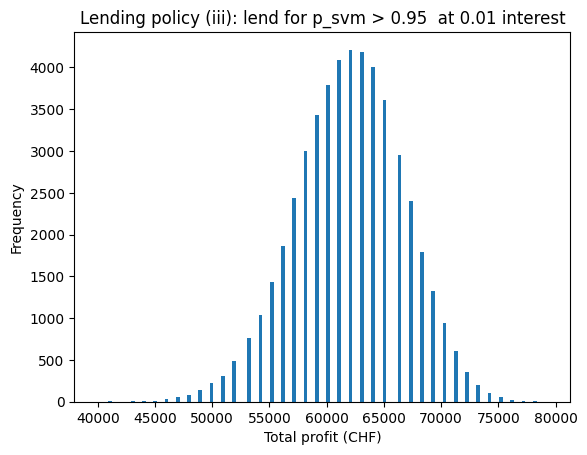

In [20]:
# Plot the histogram of profits and losses
plt.hist(pnl_iii, bins = 'auto')
plt.title('Lending policy (iii): lend for p_svm > 0.95  at 0.01 interest')
plt.xlabel('Total profit (CHF)')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Calculate expected profit and losses, compute 95%-VaR and 95%-ES
E_iii = pnl_iii.mean()
VaR_iii, ES_iii = risk(pnl_iii)
print(f'Policy (iii): Mean = {E_iii}, VaR = {VaR_iii}, ES = {ES_iii}')

Policy (iii): Mean = 61939.5968, VaR = -54070.0, ES = -52222.15909090909


In [22]:
rows = []

rows.append({'Policy' : '(i)', 'Expected profit & loss' : E_i, '95% VaR' : VaR_i, '95% ES' : ES_i})
rows.append({'Policy' : '(ii)', 'Expected profit & loss' : E_ii, '95% VaR' : VaR_ii, '95% ES' : ES_ii})
rows.append({'Policy' : '(iii)', 'Expected profit & loss' : E_iii, '95% VaR' : VaR_iii, '95% ES' : ES_iii})

results = pd.DataFrame(rows).set_index('Policy')
results = results.round(2)
print(results)

        Expected profit & loss  95% VaR    95% ES
Policy                                           
(i)                   22360.11  -2455.0   2166.89
(ii)                   4874.91   6840.0   9465.92
(iii)                 61939.60 -54070.0 -52222.16
